
# RETO

## Profesor : Maria de la Paz Rico Fernandez
## Materia   : Ciencia y analítica de datos

### Equipo 17

### Integrantes :

### Kevin Alejandro Garcia Escalante                                    A01376680
### Maria Nelly Porras A                                                           A01723828


### Fecha : 16 de Noviembre de 2022

### Limpieza de base de datos.
* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo .
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 

In [210]:
#Importar las librerias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [226]:
#Importar la dataset
df = pd.read_csv('./Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding='latin-1')
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [228]:
df.isnull().values.any()#Verificar si falta algun dato

True

In [229]:
df.isnull().any()#Verificar en que columnas falta datos. Si tiene True es por que le falta datos

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [230]:
df.describe() # Para visualizar mejor los datos

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [231]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

(-1000.0, 5000.0)

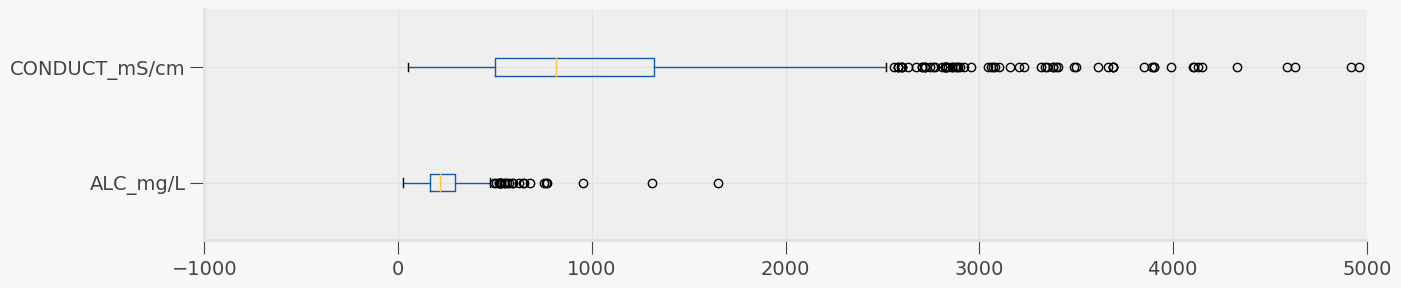

In [232]:
#Como la mediana está en box cerca al medio, se puede sustituir la mediana para los valores que faltan
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,3))
df.boxplot(column=['ALC_mg/L','CONDUCT_mS/cm'
                   ],vert=False)
plt.xlim([-1000, 5000])

In [233]:
#la Mediana de la columna 'ALC_mg/L'
df['ALC_mg/L'].median()


215.5275

In [234]:
#La mediana de la columna 'CONDUCT_mS/cm'
df['CONDUCT_mS/cm'].median()

815.0

In [235]:
df['ALC_mg/L'].fillna(value=df['ALC_mg/L'].mean(), inplace=True)#Reemplazar los Nan por la mediana de la columna ALC_mg/L

In [236]:
df['CONDUCT_mS/cm'].fillna(value=df['CONDUCT_mS/cm'].mean(), inplace=True)#Reemplazar los Nan por la mediana de la columna CONDUCT_mS/cm

In [237]:
#Eliminar las columnas que tienen muchos NAN y ademas que son redundantes por que ya se tiene el SEMAFORO 
df = df.drop(['SDT_mg/L','CLAVE','PERIODO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_DUR',
                   'N_NO3_mg/L','CALIDAD_N_NO3',
                   'CONTAMINANTES','SDT_M_mg/L',
                   'DUR_mg/L','CALIDAD_SDT_salin' ], axis=1)

In [239]:
df.isnull().any()#Verificar en que columnas falta datos. Si tiene True es por que le falta datos

SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
ALC_mg/L                False
CONDUCT_mS/cm           False
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/L             False
CALIDAD_PB              False
MN_TOT_mg/L             False
CALIDAD_MN              False
FE_TOT_mg/L             False
CALIDAD_FE              False
SEMAFORO                False
CUMPLE_CON_ALC          False
CUMPLE_CON_COND         False
CUMPLE_CON_SDT_ra       False
CUMPLE_CON_SDT_salin    False
CUMPLE_CON

In [241]:
#Correlacion 
corr_matrix = df.corr()

corr_matrix

/tmp/ipykernel_6697/3956983831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
LONGITUD,1.000000,-0.760204,0.166915,0.060803
LATITUD,-0.760204,1.000000,-0.079797,0.053506
ALC_mg/L,0.166915,-0.079797,1.000000,0.219654
CONDUCT_mS/cm,0.060803,0.053506,0.219654,1.000000


/tmp/ipykernel_6697/3032137241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)


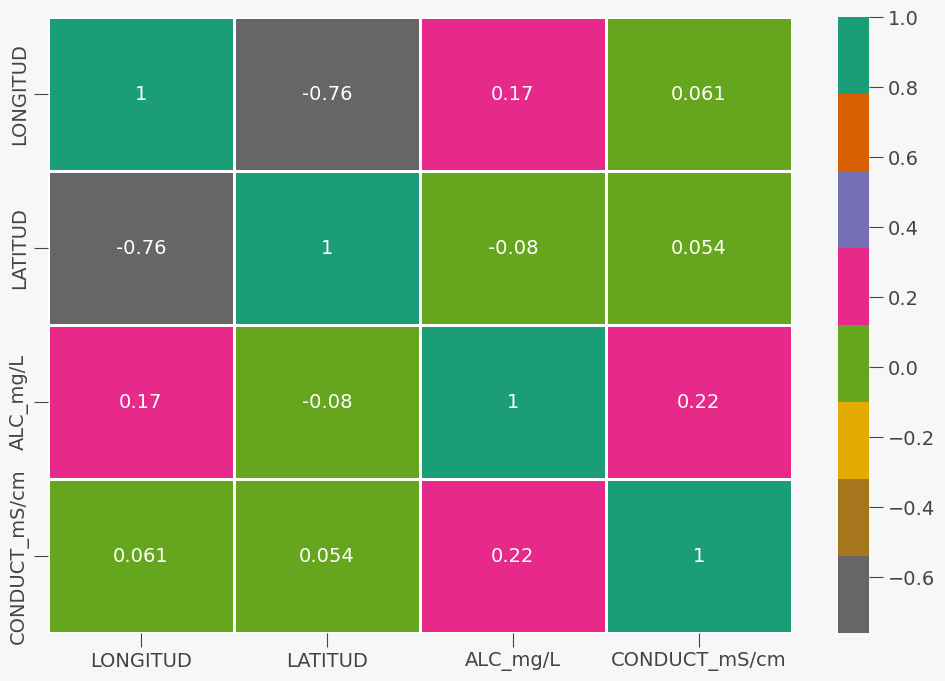

In [242]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

### Ahora el dataset está limpio

##  Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [21]:
df

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
2,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,204.920,Alta,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
4,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.244800,23.451380,309.885,Alta,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
5,POZO A.P. CNA 7 (ANTES POZO A.P. CNA 6),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.220670,23.464930,224.475,Alta,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI
7,VICTOR HUGO CESEÑA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,CABO SAN LUCAS,POZO,-109.907306,22.890500,350.760,Alta,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
9,SAN ANTONIO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LOS PLANES,POZO,-110.054722,23.824722,332.605,Alta,...,NO,NO,SI,NO,SI,SI,SI,SI,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,L-343 (EJIDO ELDIEZ),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.434410,24.848210,410.625,Indeseable como FAAP,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1062,L-363 - B (COMUNIDAD EL CARMEN DE LOS ELIZONDO),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.439140,24.974780,199.800,Alta,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
1063,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.541910,24.760360,231.045,Alta,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.700990,24.782800,256.000,Alta,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


#Normalizar los datos
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df[['LONGITUD','LATITUD']] = min_max_scaler.fit_transform(df[['LONGITUD','LATITUD']])
df[['LONGITUD','LATITUD']] = pd.DataFrame(df[['LONGITUD','LATITUD']]) # Hay que convertir a DF el resultado.
df[['LONGITUD','LATITUD']] = df[['LONGITUD','LATITUD']].rename(columns = {0: 'Close', 1: 'Volume'})
df_normalizado=df[['LONGITUD','LATITUD']]

In [243]:
# Importar librerias
from sklearn import preprocessing 
from sklearn.cluster import KMeans


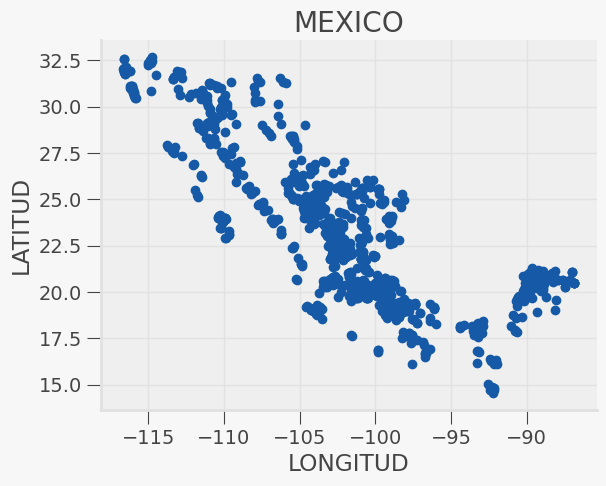

In [244]:
# Representacion de los datos
#%% Representación gráfica de los datos.
x = df['LONGITUD'].values
y = df['LATITUD'].values
plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')
plt.title('MEXICO')
plt.plot(x,y,'o')
df_mex = df[['LONGITUD','LATITUD']]


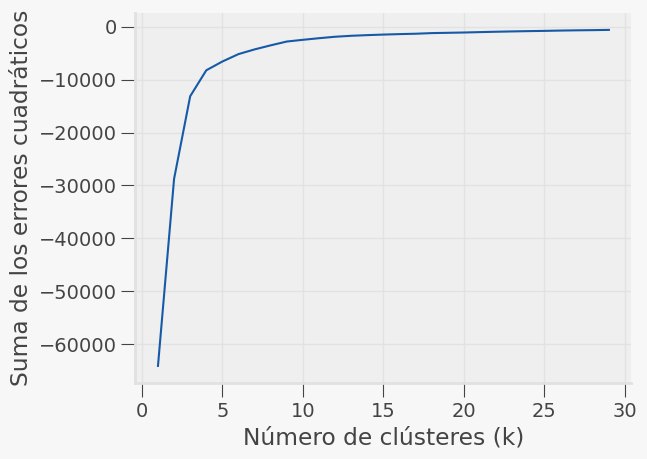

In [245]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_mex).score(df_mex) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [246]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_mex)
centroids = kmeans.cluster_centers_
print(centroids)

[[-102.60937649   24.22611893]
 [ -90.09271578   19.6502625 ]
 [-112.58798516   30.31649148]
 [-100.12788578   19.84203543]
 [-107.83025864   25.85563986]]


In [247]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_mex)
df['label'] = labels

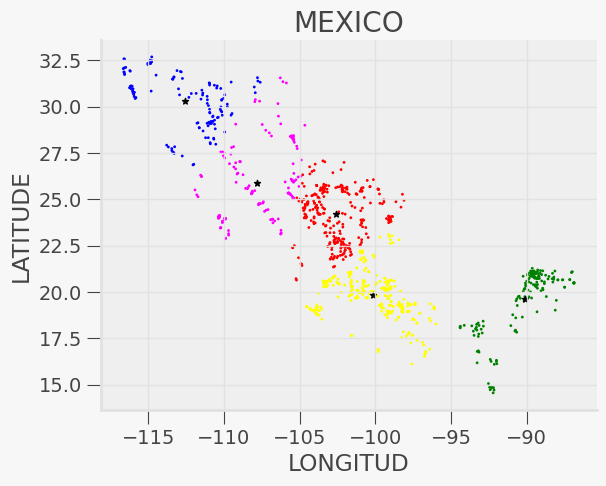

In [248]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('LONGITUD')
plt.ylabel('LATITUDE')
plt.title('MEXICO')
plt.show()

In [249]:
df_mex

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


In [250]:
#Importar libreria de geopandas
import geopandas as gpd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [251]:
df_mex["Coordinates"] = list(zip(df_mex.LONGITUD, df_mex.LATITUD))
df_mex["Coordinates"] = df_mex["Coordinates"].apply(Point)
df_mex.head()

/tmp/ipykernel_6697/3389340044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex["Coordinates"] = list(zip(df_mex.LONGITUD, df_mex.LATITUD))
/tmp/ipykernel_6697/3389340044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex["Coordinates"] = df_mex["Coordinates"].apply(Point)


,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


In [252]:
gdf = gpd.GeoDataFrame(df_mex, geometry="Coordinates")
gdf.head()

,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)


In [253]:
#Mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [254]:
#Graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

## Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

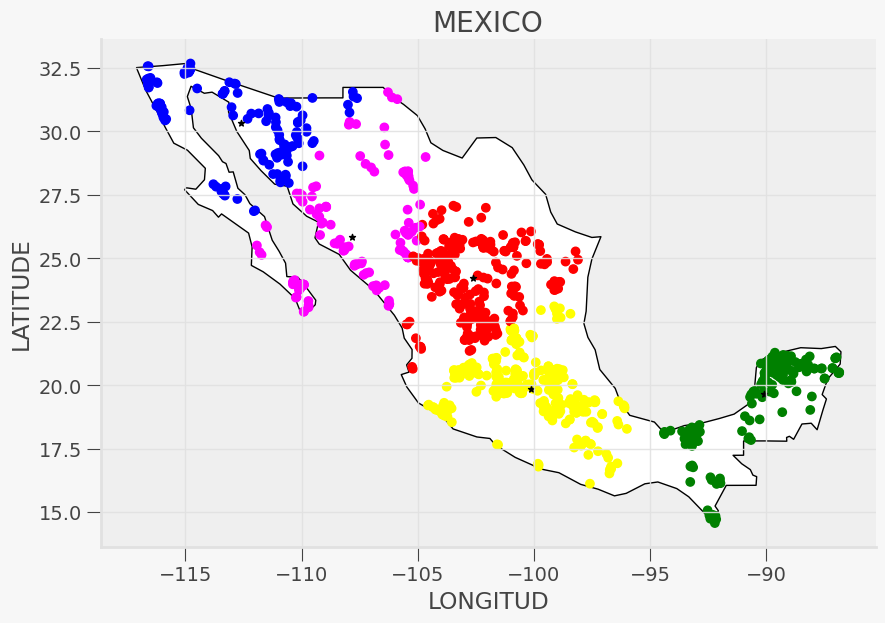

In [255]:
fig, gax = plt.subplots(figsize=(10,10))

# Plot de Mexico
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# Longitud y latitud del data set
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('LONGITUD')
plt.ylabel('LATITUDE')
plt.title('MEXICO')
plt.show()

In [256]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [257]:
#Se agregan los cluster al dataset
df_mex['cluster'] = kmeans.labels_

/tmp/ipykernel_6697/320866836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex['cluster'] = kmeans.labels_


In [258]:
#Dataset con el cluster
df_mex


,LONGITUD,LATITUD,Coordinates,cluster
0,-102.02210,22.20887,POINT (-102.02210 22.20887),0
1,-102.20075,21.99958,POINT (-102.20075 21.99958),0
2,-102.28801,22.36685,POINT (-102.28801 22.36685),0
3,-102.29449,22.18435,POINT (-102.29449 22.18435),0
4,-110.24480,23.45138,POINT (-110.24480 23.45138),4
...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),0
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),0
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),0
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),0


In [259]:
#Se agrega la columna Semaforo al dataset: df_mex
df_mex['SEMAFORO'] = df[['SEMAFORO']]

/tmp/ipykernel_6697/816085304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mex['SEMAFORO'] = df[['SEMAFORO']]


## Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [260]:
#Se puede apreciar cada cluster y su determinada valor deacuerdo al SEMAFORO
df[['SEMAFORO']]

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


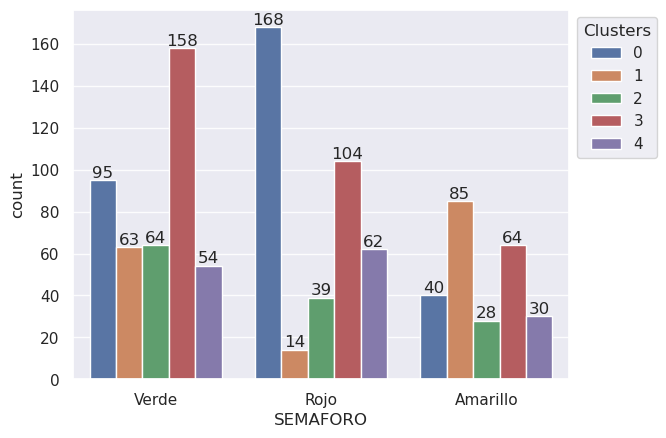

In [278]:
# plot and add annotations
p = sns.countplot(data=df_mex, x='SEMAFORO', hue='cluster')
p.legend(title='Clusters', bbox_to_anchor=(1, 1), loc='upper left')

#df2 = df.loc[(df['department']=='alcohol')
#color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy']

for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

* Para determinar el resultado de que si existe una relacion entre la calidad del agua y la ubicacion geografica se realizara un modelo para ver si el resultado es similar al que se encuentra en esta grafica donde se puede apreciar los 5 clusters y la cantidad de Rojo, Verde y amarillo para cada cluster